드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


라이브러리 불러오기

In [ ]:
# 1.데이터 불러오는 라이브러리
import os
import glob
import random
import shutil

# 3. csv 파일로 변경할 때 필요
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

라벨링 개수와 이미지 개수 일치 시키기

In [ ]:
# 이미지 파일 모두 리스트에 저장
%cd /content/gdrive/MyDrive/data/raw_data/images_c
images = glob.glob("*.jpg")

# 라벨링 파일 모두 리스트에 저장
%cd /content/gdrive/MyDrive/data/raw_data/labels
labels = glob.glob("*.xml")

# 이미지, 라벨링 개수 확인
print(len(images))
# print(images[:5])
print(len(labels))

# 삭제해야 하는 이미지 파일 출력하기
for img in images:
  if img[:-4]+".xml" not in labels:
    print("없는 파일 : ",img)

%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive/data/raw_data/images_c
/content/gdrive/MyDrive/data/raw_data/labels
638
638
/content/gdrive/MyDrive


%cd /content/gdrive/MyDrive/ 위치로 이동하기

In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


raw_data파일에 있는 images와 labels 훈련데이터, 테스트 데이터 나우기

In [ ]:
raw_data_path = "/content/gdrive/MyDrive/data/raw_data/images_c"
train_data_path = "/content/gdrive/MyDrive/data/split_data/train"
test_data_path = "/content/gdrive/MyDrive/data/split_data/test"

# split_data 폴더가 존재하지 않으면 생성
if not os.path.exists("/content/gdrive/MyDrive/data/split_data/"):
  os.mkdir("/content/gdrive/MyDrive/data/split_data/")
  
try:
  shutil.rmtree(train_data_path)
  shutil.rmtree(test_data_path)
except:
  pass

os.mkdir(train_data_path)
os.mkdir(test_data_path)

# 이미지 파일들 total_files에 저장
total_files = glob.glob(raw_data_path + "/*.jpg")
print("샘플 이미지  = ", total_files)
print("이미지 총 개수 = ", len(total_files))

# 이미지 총 개수를 0~N까지 리스트로 만들어서 indices에 저장
indices = list(range(len(total_files)))
# train_indices : 임의의 숫자 k개를 뽑아서 리스트로 만들어줌(7:3)
train_indices = random.sample(indices, k = int(len(total_files)*0.7))
print("훈련데이터 개수 = ", len(train_indices))

# 아래 코드는 주석처리함

# 총 이미지 개수만큼 for문을 돌릴거임
# raw data에서 훈련데이터와 테스트데이터를 나눌 예정
for i in indices:
    # 숫자가 train_indices에 있으면 train에 해당되는 것이므로 훈련데이터 폴더에 복사하기
    if (i in train_indices):
        # Copy to train
        shutil.copy(total_files[i], train_data_path + total_files[i].replace(raw_data_path,""))
        shutil.copy(total_files[i].replace("images_c","labels").replace(".jpg",".xml"), 
                    train_data_path + total_files[i].replace(raw_data_path, "").replace(".jpg",".xml"))
    else:
        # Copy to test
        shutil.copy(total_files[i], test_data_path + total_files[i].replace(raw_data_path, ""))
        shutil.copy(total_files[i].replace("images_c", "labels").replace(".jpg", ".xml"),
                    test_data_path + total_files[i].replace(raw_data_path, "").replace(".jpg",".xml"))


샘플 이미지  =  ['/content/gdrive/MyDrive/data/raw_data/images_c/2743422574_front_fc588da677.jpg', '/content/gdrive/MyDrive/data/raw_data/images_c/1a733d1b96.jpg', '/content/gdrive/MyDrive/data/raw_data/images_c/LE1206472333_1235360046_1.jpg', '/content/gdrive/MyDrive/data/raw_data/images_c/LO1445617806_1445617807_1.jpg', '/content/gdrive/MyDrive/data/raw_data/images_c/LO1687559793_1687559794_1.jpg', '/content/gdrive/MyDrive/data/raw_data/images_c/thumb-mmexport1591976144922_600x600.jpg', '/content/gdrive/MyDrive/data/raw_data/images_c/2055948_535040_2925.jpg', '/content/gdrive/MyDrive/data/raw_data/images_c/a300af8156a72.jpg', '/content/gdrive/MyDrive/data/raw_data/images_c/15bebbcf97c08cb86ad68d7e22e36b0f_1599576449_7643.jpg', '/content/gdrive/MyDrive/data/raw_data/images_c/LE1209329047_1250496480_1.jpg', '/content/gdrive/MyDrive/data/raw_data/images_c/15371095_27883236_300.jpg', '/content/gdrive/MyDrive/data/raw_data/images_c/09b8813aaf434860435f769e9d9051b4.jpg', '/content/gdrive/MyDriv

In [ ]:
# 잘 나눠졌는지 확인하기
%cd /content/gdrive/MyDrive/data/split_data/train
train_ = glob.glob("*")
print(len(train_))
%cd /content/gdrive/MyDrive/data/split_data/test
test_ = glob.glob("*") 
print(len(test_))

/content/gdrive/MyDrive/data/split_data/train
892
/content/gdrive/MyDrive/data/split_data/test
384


label 내용을 csv파일로 저장함

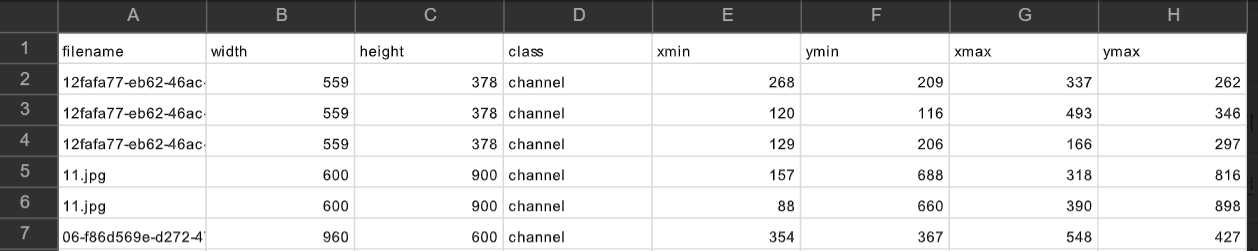

In [ ]:
# 3.Convert XML label to  CSV

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

for directory in ['train','test']:
        image_path = os.path.join('/content/gdrive/MyDrive/data/split_data/{}'.format(directory))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv('/content/gdrive/MyDrive/data/split_data/{}_labels.csv'.format(directory), index=None)
        print('Successfully converted xml to csv.')
     

Successfully converted xml to csv.
Successfully converted xml to csv.


pre-trained 모델 다운로드(클론)

In [ ]:
%cd /content/gdrive/MyDrive
# !git clone https://github.com/tensorflow/models.git

/content/gdrive/MyDrive


In [ ]:
# 5. Compile the protos -  
# Protocol Buffers (Protobuf) is a free and open-source cross-platform data format used to serialize structured data.
%cd /content/gdrive/MyDrive/models/research
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/MyDrive/models/research


API 설정

In [ ]:
%cd /content/gdrive/MyDrive/models/research
!cp /content/gdrive/MyDrive/models/research/object_detection/packages/tf2/setup.py .

/content/gdrive/MyDrive/models/research


In [ ]:
# !python -m pip install  .

Test API

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

2022-12-17 05:21:01.662507: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-17 05:21:01.662631: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-17 05:21:01.662652: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Running tests under Python 3.8.16: /usr/bin/python3
[ RUN

CSV에서 TFRecordfh. and MiAI_SSD_TF2 클론

In [ ]:
%cd /content/gdrive/MyDrive/models/research
# !git clone https://github.com/thangnch/MiAI_SSD_TF2 #이미 생성되었음
!cp MiAI_SSD_TF2/generate_tfrecord.py .
!cp MiAI_SSD_TF2/label_map.txt /content/gdrive/MyDrive/data

/content/gdrive/MyDrive/models/research


In [ ]:
if not os.path.exists("/content/gdrive/MyDrive/data/tfrecord_data/"):
  os.mkdir("/content/gdrive/MyDrive/data/tfrecord_data/")

!python generate_tfrecord.py --image_dir=/content/gdrive/MyDrive/data/split_data/train --csv_input=/content/gdrive/MyDrive/data/split_data/train_labels.csv --output_path=/content/gdrive/MyDrive/data/tfrecord_data/train.record 
!python generate_tfrecord.py --image_dir=/content/gdrive/MyDrive/data/split_data/test --csv_input=/content/gdrive/MyDrive/data/split_data/test_labels.csv --output_path=/content/gdrive/MyDrive/data/tfrecord_data/test.record 


2022-12-17 05:26:32.117885: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-17 05:26:32.118003: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-17 05:26:32.118025: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Traceback (most recent call last):
  File "generate_tfrec

Download pretrain and config

In [ ]:
# 이미 있으므로 생략하겠음(pipeliine.config)
# if not os.path.exists("/content/gdrive/MyDrive/pretrained"):
#   os.mkdir("/content/gdrive/MyDrive/pretrained")

# %cd /content/gdrive/MyDrive/pretrained
# !wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
# # Unzip
# !tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

# # Config pipeline.config, label_map.txt if needed


label파일들 object-detection.txt를 data 폴더에 업로드

In [ ]:
%cd /content/gdrive/MyDrive/models
# !pip install -r /content/gdrive/MyDrive/models/research/MiAI_SSD_TF2/setup.txt
# !pip install --upgrade opencv-python

/content/gdrive/MyDrive/models


Train and Test

In [ ]:
# Train
%cd /content/gdrive/MyDrive/models/research
%cp /content/gdrive/MyDrive/models/research/object_detection/model_main_tf2.py .

/content/gdrive/MyDrive/models/research


In [ ]:
#train 
!python model_main_tf2.py \
--pipeline_config_path=/content/gdrive/MyDrive/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config \
--model_dir=/content/gdrive/MyDrive/output_model --alsologtostderr --num_train_steps=500
     

2022-12-17 05:51:24.221623: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-17 05:51:24.221740: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-17 05:51:24.221769: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-12-17 05:51:27.623391: W tensorflow/core/common_runt

In [ ]:
# Export model   :    /content/gdrive/MyDrive/export_model/saved_model
%cd /content/gdrive/MyDrive/models/research
%cp /content/gdrive/MyDrive/models/research/object_detection/exporter_main_v2.py .


/content/gdrive/MyDrive/models/research


In [ ]:
# Export model2   :    /content/gdrive/MyDrive/export_model/saved_model
!python exporter_main_v2.py \
--trained_checkpoint_dir=/content/gdrive/MyDrive/output_model \
--pipeline_config_path=/content/gdrive/MyDrive/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config \
--output_directory=/content/gdrive/MyDrive/export_model


2022-12-17 05:23:27.742969: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-17 05:23:27.743108: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.8/dist-packages/cv2/../../lib64:/usr/lib64-nvidia
2022-12-17 05:23:27.743130: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2022-12-17 05:23:30.851875: W tensorflow/core/common_runt

In [ ]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

#Load model
tf.keras.backend.clear_session()
model = tf.saved_model.load("/content/gdrive/MyDrive/export_model/saved_model")
     

ValueError: ignored

In [ ]:
# Các hàm inference

import cv2
def run_inference_for_single_image(model, image):
  
  image = np.asarray(image)
  input_tensor = tf.convert_to_tensor(image)
  input_tensor = input_tensor[tf.newaxis,...]

  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  if 'detection_masks' in output_dict:
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)
     

In [ ]:
%cd /content/gdrive/MyDrive/models/research
category_index = label_map_util.create_category_index_from_labelmap("/content/gdrive/MyDrive/data/label_map.txt", use_display_name=True)

image_path = '/content/gdrive/MyDrive/data/split_data/test/img5.jpg'
image_np = load_image_into_numpy_array(image_path)
print("Done load image ")
image_np = cv2.resize(image_np, dsize=None, fx=0.2, fy=0.2)
output_dict = run_inference_for_single_image(model, image_np)
print("Done inference")
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks_reframed', None),
    use_normalized_coordinates=True,
    line_thickness=8)
print("Done draw on image ")
display(Image.fromarray(image_np))